In [39]:
import pandas as pd

In [40]:
location = "freq_kata.csv"

In [41]:
df = pd.read_csv(location)

In [42]:
from matplotlib import pyplot as plt

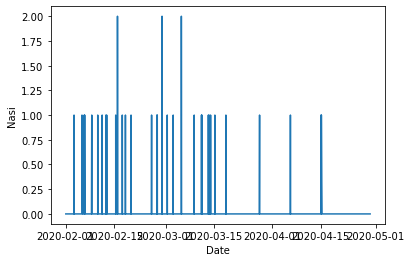

In [43]:
df = pd.read_csv(location, parse_dates = ['created_at'], index_col = ['created_at'])
df.drop(df.columns[0], axis=1, inplace=True)
plt.xlabel('Date')
plt.ylabel('Nasi')
plt.plot(df)

In [44]:
df.index = df.index.to_period('D')
df.head()

,nasi
created_at,
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0


In [45]:
df = df.groupby('created_at').sum()
df.head()

,nasi
created_at,
2020-02-01,0
2020-02-02,0
2020-02-03,1
2020-02-04,0
2020-02-05,1


In [46]:
from pandas.plotting import autocorrelation_plot

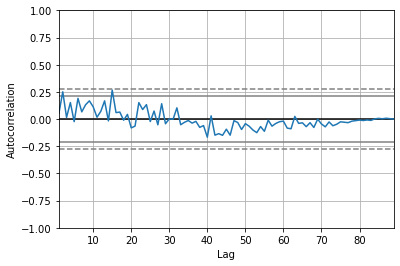

In [47]:
autocorrelation_plot(df)
plt.show()

Lag = 10

In [48]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(df, order=(10,1,0))
model_fit = model.fit()

In [49]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   nasi   No. Observations:                   89
Model:                ARIMA(10, 1, 0)   Log Likelihood                 -95.713
Date:                Fri, 16 Apr 2021   AIC                            213.426
Time:                        12:51:56   BIC                            240.676
Sample:                    02-01-2020   HQIC                           224.404
                         - 04-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9357      0.119     -7.875      0.000      -1.169      -0.703
ar.L2         -0.7012      0.174     -4.031      0.000      -1.042      -0.360
ar.L3         -0.6898      0.190     -3.630      0.0

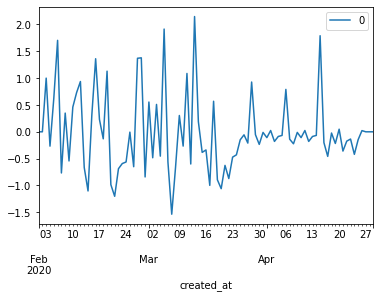

In [50]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

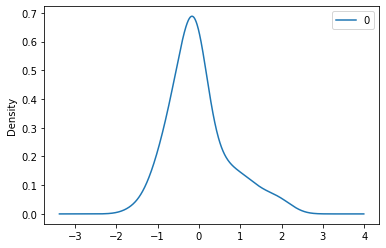

In [51]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [52]:
# summary stats of residuals
print(residuals.describe())

               0
count  89.000000
mean   -0.013993
std     0.717095
min    -1.535156
25%    -0.457967
50%    -0.108577
75%     0.231257
max     2.147388


# Forecasting Timeseries

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Merah = predictions,
Biru = expected value

predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.064209, expected=0.000000
predicted=0.234419, expected=1.000000
predicted=0.072887, expected=2.000000
predicted=0.540235, expected=0.000000
predicted=0.497222, expected=1.000000
predicted=0.443256, expected=0.000000
predicted=0.488752, expected=1.000000
predicted=0.292359, expected=1.000000
predicted=1.021435, expected=2.000000
predicted=0.719906, expected=0.000000
predicted=1.143352, expected=0.000000
predicted=0.707783, expected=1.000000
predicted=0.619111, expected=2.000000
predicted=0.823953, expected=1.000000
predicted=1.087795, expected=1.000000
predicted=0.731382, expected=2.000000
predicted=1.011505, expected=0.000000
predicted=1.217486, expected=0.000000
predicted=0.839075, expected=0.000000
predicted=0.721681, expected=0.000000
predicted=0.505869, expected=0.000000
predicted=0.958070, expected=1.000000
predicted=0.678736, expected=0.000000
predicted=0.

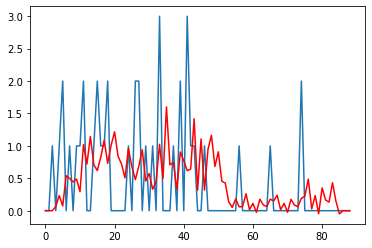

In [54]:
# split into train and test sets
X = df.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
train, test = X, X
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()